# Load Data

In [2]:
data = 'https://archive.ics.uci.edu/static/public/222/bank+marketing.zip'
!wget $data
!unzip bank+marketing.zip
!unzip bank.zip

--2024-10-23 05:11:19--  https://archive.ics.uci.edu/static/public/222/bank+marketing.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘bank+marketing.zip’

bank+marketing.zip      [  <=>               ] 999.85K  2.46MB/s    in 0.4s    

2024-10-23 05:11:20 (2.46 MB/s) - ‘bank+marketing.zip’ saved [1023843]

Archive:  bank+marketing.zip
 extracting: bank.zip                
 extracting: bank-additional.zip     
Archive:  bank.zip
  inflating: bank-full.csv           
  inflating: bank-names.txt          
  inflating: bank.csv                


In [3]:
! ls

bank-additional.zip  bank-full.csv	 bank-names.txt  sample_data
bank.csv	     bank+marketing.zip  bank.zip


# Load Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

# Prepare Dataset

Keep Selected Columns

In [6]:
df = pd.read_csv('bank-full.csv', sep=';')

columns = ['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']

df = df[columns]

Remove unwanted spaces on column headers and values

In [7]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [8]:
df.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,no


Encode "Y" Variable

In [9]:
df.y = (df.y == "yes").astype(int)

In [10]:
df.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,0


Split Dataset

In [11]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.y.values
y_val = df_val.y.values
y_test = df_test.y.values

del df_train['y']
del df_val['y']
del df_test['y']

In [12]:
len(df_train), len(df_val), len(df_test)

(27126, 9042, 9043)

Select Columns by type

In [13]:
numerical = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
categorical = ['job', 'marital', 'education', 'housing', 'contact', 'month',
       'poutcome']

# Question 1

Which numerical variable (among the following 4) has the highest AUC?

* balance
* day
* duration+
* previous

In [14]:
from sklearn.metrics import roc_auc_score

better_result = 0
better_numerical = None

for n in numerical:
    result = roc_auc_score(y_train, df_train[n])

    if result < 0.5:
        result = roc_auc_score(y_train, -df_train[n])

    print(n, round(result, 3))

    if result > better_result:
        better_result = result
        better_numerical = n

print('Better numerical: ', better_numerical)
print('Better result: ', round(better_result, 3))

age 0.512
balance 0.589
day 0.526
duration 0.815
campaign 0.571
pdays 0.59
previous 0.599
Better numerical:  duration
Better result:  0.815




> Q1 Answer = **duration**



# Question 2

What's the AUC of this model on the validation dataset? (round to 3 digits)

* 0.69
* 0.79
* 0.89
* 0.99

# Train the model

Vectorize features on train dataset

In [15]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)


In [16]:
X_train

array([[5.60e+01, 4.00e+01, 2.00e+00, ..., 0.00e+00, 1.00e+00, 0.00e+00],
       [3.30e+01, 4.79e+03, 1.00e+00, ..., 0.00e+00, 0.00e+00, 2.00e+00],
       [3.20e+01, 3.92e+02, 2.00e+00, ..., 0.00e+00, 1.00e+00, 0.00e+00],
       ...,
       [5.20e+01, 2.89e+02, 1.30e+01, ..., 0.00e+00, 1.00e+00, 0.00e+00],
       [3.20e+01, 3.12e+02, 4.00e+00, ..., 0.00e+00, 1.00e+00, 0.00e+00],
       [3.80e+01, 5.80e+02, 6.00e+00, ..., 0.00e+00, 1.00e+00, 0.00e+00]])

In [17]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

Invoke and train model

In [18]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

vectorize validation split

In [19]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

Make Predictions with "standar" threshold (o.5)

In [20]:
y_pred = model.predict_proba(X_val)[:, 1]
deposit_decision = (y_pred >= 0.5)

In [21]:
deposit_decision[:10]

array([False, False, False, False, False, False, False, False, False,
       False])

Calculate Accuracy

In [22]:
(y_val == deposit_decision).mean()

0.8985843839858438

Calculat AUC ROC Score

In [23]:
roc_auc_score(y_val,deposit_decision).round(3)

0.658

Answer = **0.69**

# Not Evaluated

Get Accuracy plot with several Thresholds

In [24]:
from sklearn.metrics import accuracy_score

thresholds = np.linspace(0, 1, 21)

scores = []

for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.121
0.05 0.654
0.10 0.816
0.15 0.859
0.20 0.881
0.25 0.892
0.30 0.896
0.35 0.898
0.40 0.900
0.45 0.898
0.50 0.899
0.55 0.897
0.60 0.895
0.65 0.895
0.70 0.892
0.75 0.891
0.80 0.888
0.85 0.886
0.90 0.884
0.95 0.881
1.00 0.879


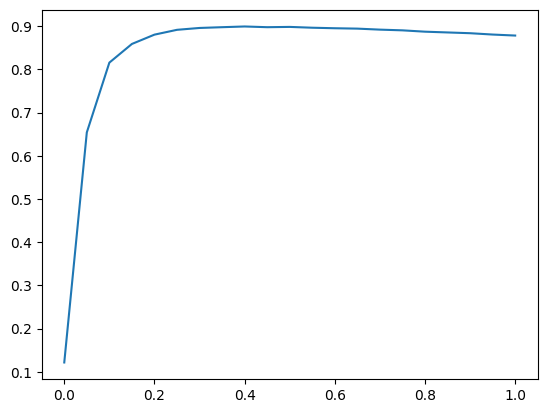

In [25]:
plt.plot(thresholds, scores)

In [26]:
max(scores)

0.8995797389957974

# Question 3

At which threshold precision and recall curves intersect?

* 0.265
* 0.465
* 0.665
* 0.865

In [27]:
1 / 0.01

100.0

<ipython-input-29-064b9f8b00fa>:18: RuntimeWarning: invalid value encountered in scalar divide
  p = tp / (tp + fp)


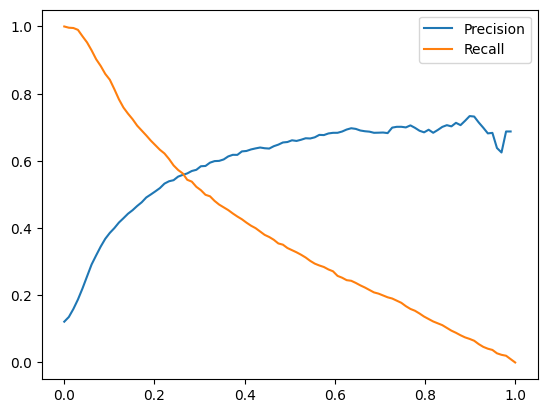

In [29]:
thresholds = np.linspace(0, 1, 100)
precision_list = []
recall_list = []

actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

for t in thresholds:
  predict_positive = (y_pred >= t)
  predict_negative = (y_pred < t)

  tp = (predict_positive & actual_positive).sum()
  tn = (predict_negative & actual_negative).sum()

  fp = (predict_positive & actual_negative).sum()
  fn = (predict_negative & actual_positive).sum()

  p = tp / (tp + fp)
  r = tp / (tp + fn)

  precision_list.append(p)
  recall_list.append(r)

  #print('%.2f %.3f %.3f' % (t, p, r))

plt.plot(thresholds, precision_list, label='Precision')
plt.plot(thresholds, recall_list, label='Recall')
plt.legend()


Answer = **0.265**

# Question 4

At which threshold F1 is maximal?

* 0.02
* 0.22
* 0.42
* 0.62

In [30]:
thresholds = np.linspace(0, 1, 100)

best_f1 = 0
best_t = 0

actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

for t in thresholds:
  predict_positive = (y_pred >= t)
  predict_negative = (y_pred < t)

  tp = (predict_positive & actual_positive).sum()
  tn = (predict_negative & actual_negative).sum()

  fp = (predict_positive & actual_negative).sum()
  fn = (predict_negative & actual_positive).sum()

  p = tp / (tp + fp)
  r = tp / (tp + fn)

  f1 = 2 * p * r / (p + r)

  if f1 > best_f1:
    best_f1 = f1
    best_t = t

  #print('%.2f %.3f %.3f %.3f' % (t, p, r, f1))

print('Best t: ', best_t)
print('Best f1: ', best_f1)

Best t:  0.22222222222222224
Best f1:  0.5737085258294834


<ipython-input-30-fdd89d1e9937>:19: RuntimeWarning: invalid value encountered in scalar divide
  p = tp / (tp + fp)


Answer = **0.22**

# Question 5

How large is standard deviation of the scores across different folds?

* 0.0001
* 0.006
* 0.06
* 0.26

Instal TDQM

In [33]:
! pip install tqdm

In [42]:
numerical = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
categorical = ['job', 'marital', 'education', 'housing', 'contact', 'month',   'poutcome']

Define Train Function

In [56]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)

    return dv, model

Define Predict function

In [57]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [65]:
df_train[categorical + numerical]

,job,marital,education,housing,contact,month,poutcome,age,balance,day,duration,campaign,pdays,previous
22468,management,married,tertiary,no,cellular,aug,unknown,52,0,22,232,2,-1,0
28408,blue-collar,married,primary,yes,cellular,jan,failure,45,300,29,203,1,261,3
8481,technician,married,secondary,yes,unknown,jun,unknown,38,27,3,404,4,-1,0
28753,services,single,secondary,no,cellular,jan,unknown,31,887,30,427,1,-1,0
14660,admin.,married,tertiary,yes,cellular,jul,unknown,41,226,15,157,5,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7813,management,single,tertiary,yes,unknown,may,unknown,36,2806,30,358,4,-1,0
43723,technician,married,tertiary,no,cellular,may,unknown,50,1830,14,318,3,-1,0
32511,management,divorced,tertiary,yes,cellular,apr,unknown,34,528,17,233,2,-1,0
5192,management,married,tertiary,no,unknown,may,unknown,48,4191,21,363,6,-1,0


Invoke Train Function

In [58]:
dv, model = train(df_train, y_train, C=1)

Make soft predictions

In [59]:
y_pred = predict(df_val, dv, model)

In [60]:
y_pred

array([0.00891489, 0.15423796, 0.10298175, ..., 0.07110625, 0.08506967,
       0.01231964])

Import aditional libraries

In [61]:
from sklearn.model_selection import KFold
from tqdm.auto import tqdm

Train the model with 5 folds and record auc scores

In [62]:
n_splits = 5
kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)
scores = []

for train_idx, val_idx in kfold.split(df_full_train):

  df_train = df_full_train.iloc[train_idx]
  df_val = df_full_train.iloc[val_idx]

  y_train = df_train.y.values
  y_val = df_val.y.values

  dv, model = train(df_train, y_train)
  y_pred = predict(df_val, dv, model)

  print(y_pred)

  auc = roc_auc_score(y_val, y_pred)
  scores.append(auc)

print(scores)
print(np.std(scores))

[0.02203257 0.03850955 0.02290267 ... 0.24440768 0.12611225 0.12041844]
[0.09105592 0.06534516 0.03973847 ... 0.03157884 0.04396405 0.00809806]
[0.14831832 0.02641919 0.39992374 ... 0.027235   0.0307508  0.07421958]
[0.05015256 0.33026732 0.00861345 ... 0.02892437 0.04986867 0.1136378 ]
[0.00891489 0.15423796 0.10298175 ... 0.07110625 0.08506967 0.01231964]
[0.8992842405563055, 0.8990110164487815, 0.9111641244449282, 0.9078905031338849, 0.9119728949040351]
0.005652844370349586


Answer = **0.006**

# Question 6

In [63]:
n_splits = 5

for C in tqdm([0.000001, 0.001, 1]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.y.values
        y_val = df_val.y.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/3 [00:00<?, ?it/s]

C=1e-06 0.701 +- 0.009
C=0.001 0.861 +- 0.007
C=1 0.906 +- 0.006


Answer = **1**